### Toymodel Train Test Evaluation

In [1]:
%load_ext autoreload
%autoreload 2
%env CUDA_VISIBLE_DEVICES=0
import numpy as np
import torch
from torch import nn
from mapsgan import cVAESolver, BicycleGenerator, ToyGenerator, ToyDiscriminator, data_loader
import mapsgan.experiments as experiments
from mapsgan.evaluation import Visualization

env: CUDA_VISIBLE_DEVICES=0


In [2]:
torch.cuda.is_available()

True

#### Set up dataloader, model, solver

In [3]:
experiment = experiments.ETH() # we store filepaths and arguments in here
dataset, trainloader = data_loader(in_len=8, out_len=12, batch_size=64, num_workers=1, path=experiment.test_dir,
                                  shuffle=True)

In [4]:
generator = BicycleGenerator(generator=ToyGenerator, start_mode='cvae')
discriminator = ToyDiscriminator()

In [11]:
solver = cVAESolver(generator, discriminator, 
                loss_fns={'norm': nn.L1Loss, 'gan': nn.BCEWithLogitsLoss},
                optims_args={'generator': {'lr': 1e-3}, 'discriminator': {'lr': 1e-3}})

#### Training

In [12]:
solver.train(trainloader, epochs = 20, checkpoint_every=10, print_every=False, steps = {'generator': 1, 'discriminator': 1})

Training new model


#### Test

In [13]:
output = solver.test(trainloader)

#### Evaluation
visualization of predicted trajectories

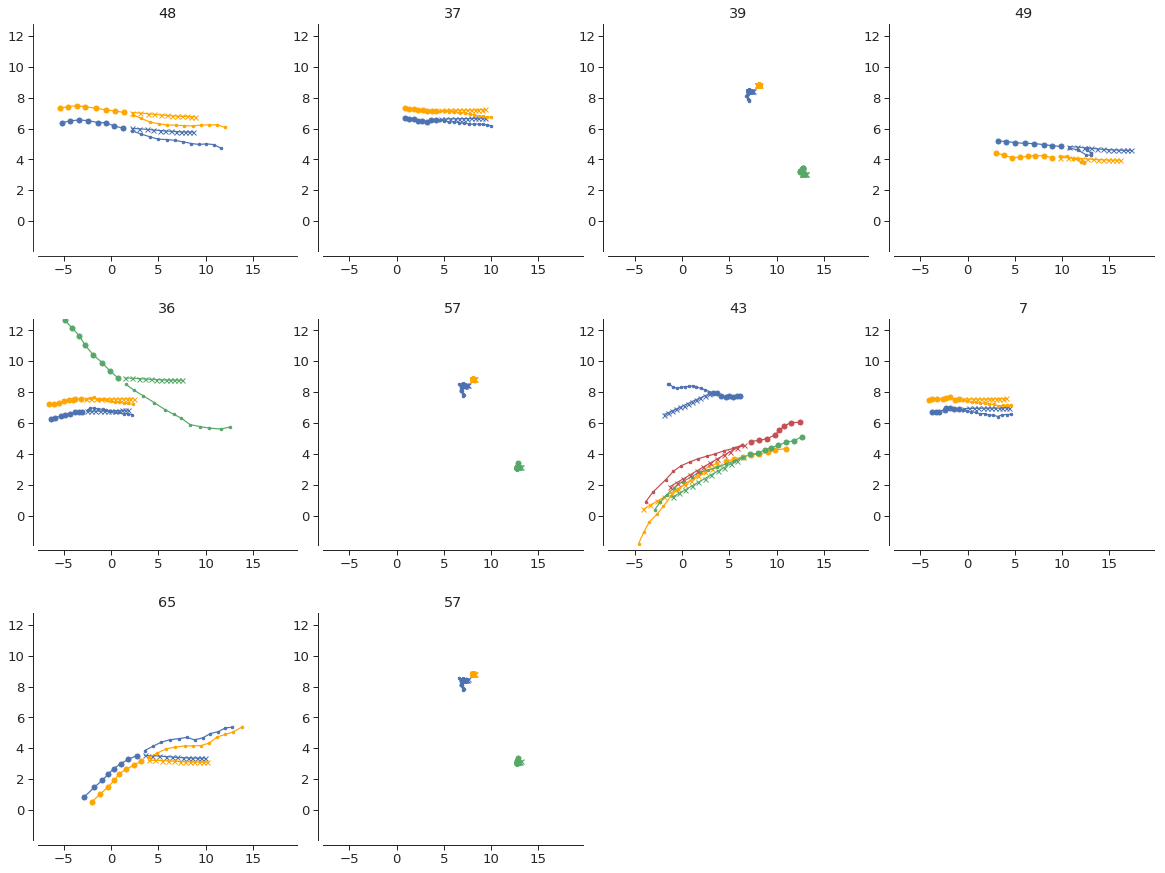

In [14]:
vis = Visualization()
ll = vis.trajectories(output, scenes=[10])